In [ ]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 62.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 75.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 26.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 85.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 46.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━

Import necessary libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

Import the dataset

In [ ]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names=['label','text'])

In [ ]:
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df.shape

(5572, 2)

Cross-validation

In [ ]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
data_train.shape

(4457, 2)

In [ ]:
data_test.shape

(1115, 2)

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(
    train_df=data_train,
    text_column = 'text',
    label_columns = 'label',
    val_df = data_test,
    preprocess_mode = 'bert') # or distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


Build the classifier

In [ ]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilbert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
#here we have taken batch size as 6 as from the documentation it is
# recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

In [ ]:
learner

Train the model

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
743/743 [==============================] - 466s 594ms/step - loss: 0.2975 - accuracy: 0.8986
Epoch 2/2
743/743 [==============================] - 182s 245ms/step - loss: 1.8241 - accuracy: 0.8098


/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss


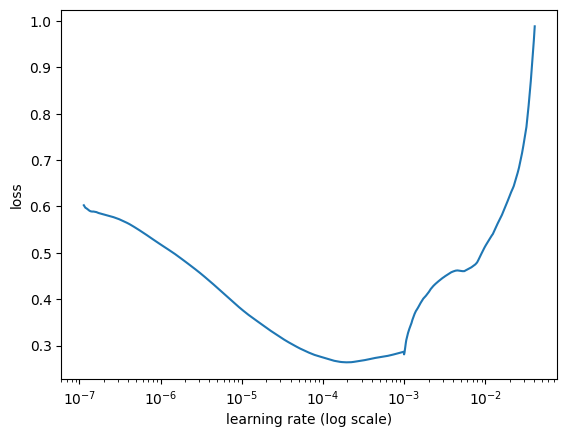

In [ ]:
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
# Essentially fit is a very basic training loop,
# whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bertspam--classifier')



begin training using onecycle policy with max lr of 2e-05...
743/743 [==============================] - 517s 662ms/step - loss: 0.0750 - accuracy: 0.9771 - val_loss: 0.0155 - val_accuracy: 0.9955


In [ ]:
msg1 = ['Freemsg: 1-month unlimited free calls! Activate SmartCall Txt: CALL to No: 68866. Subscriptn3gbp/wk unlimited calls Help: 08448714184 Stop?txt stop landlineonly']
msg2 = ['Beautiful Truth against Gravity.. Read carefully: "Our heart feels light when someone is in it.. But it feels very heavy when someone leaves it.."']

In [ ]:
predictor.predict(msg1)

['spam']

In [ ]:
predictor.predict(msg2)

['ham']